In [1]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os
import sys

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
# MPC import
import matplotlib.pyplot as plt
import numpy as np
from LinearMPC.MPCVelControl import MPCVelControl
from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis
from LinearMPC.utils import GAMA, VX, VY, VZ

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

In [3]:
Ts = 0.05
sim_time = 10
H = 10
x0 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=float)
x0[VX] = 5
x0[VY] = 5
x0[VZ] = 5
x0[GAMA] = np.deg2rad(40)

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)

xs, us = rocket.trim()
A, B = rocket.linearize(xs, us)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, _ = rocket.simulate_control(
    mpc, sim_time, H, x0, method="linear")


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Computing maximum invariant set ...
Maximum invariant set successfully computed after 10 iterations.
Computing maximum invariant set ...
Maximum invariant set successfully computed after 10 iterations.
Computing maximum invariant set ...
Maximum invariant set successfully computed after 1 iterations.
Computing maximum invariant set ...
Maximum invariant set successfully computed after 24 iterations.


/Users/jverbois/Python/epfl/MPC-Course-EPFL/.venv/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain_utils.py:30: UserWarning: The problem includes expressions that don't support CPP backend. Defaulting to the SCIPY backend for canonicalization.
  warnings.warn(UserWarning(


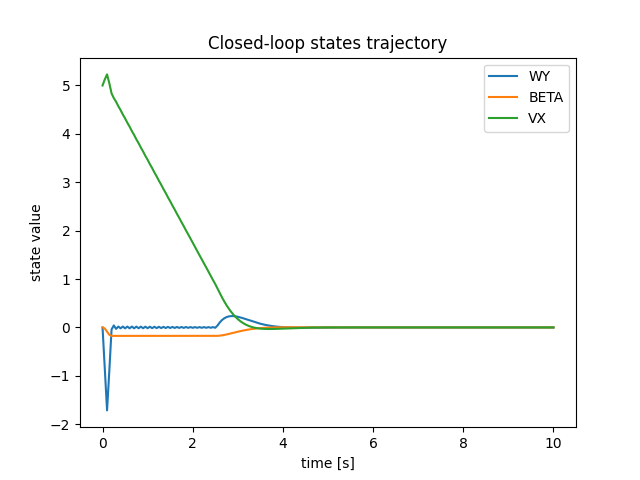

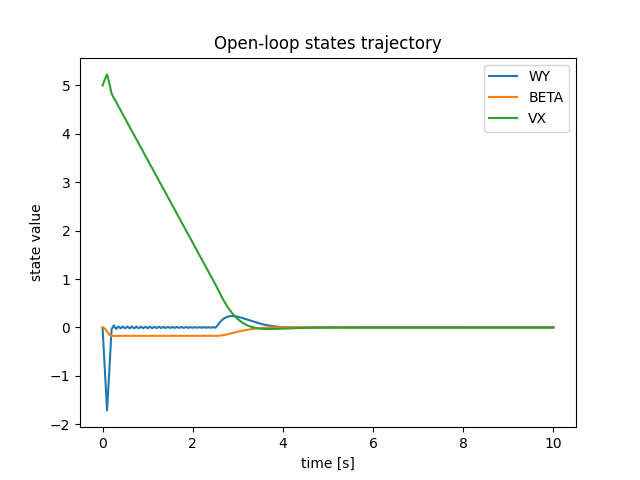

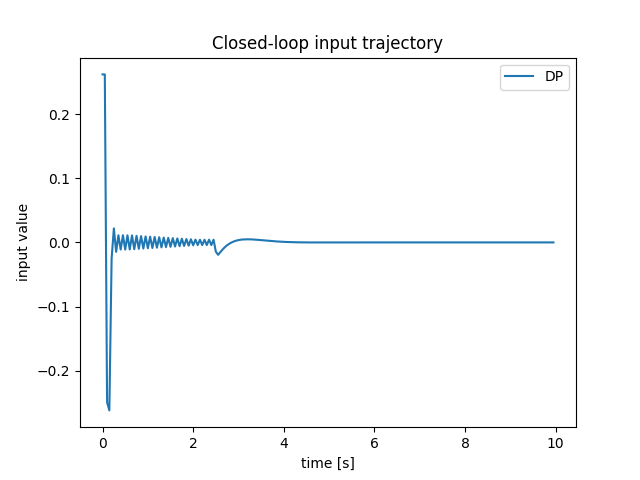

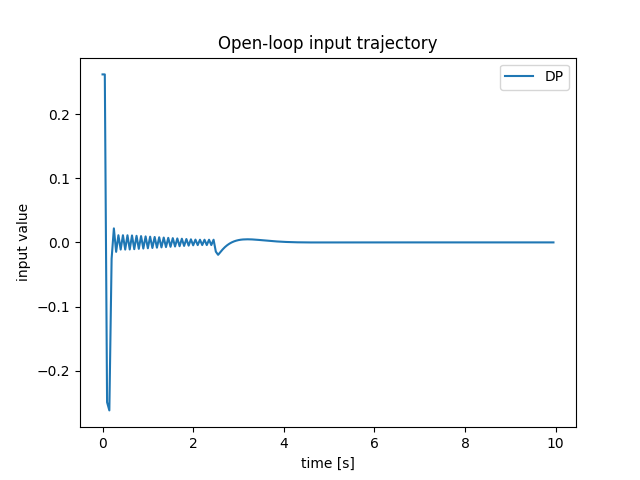

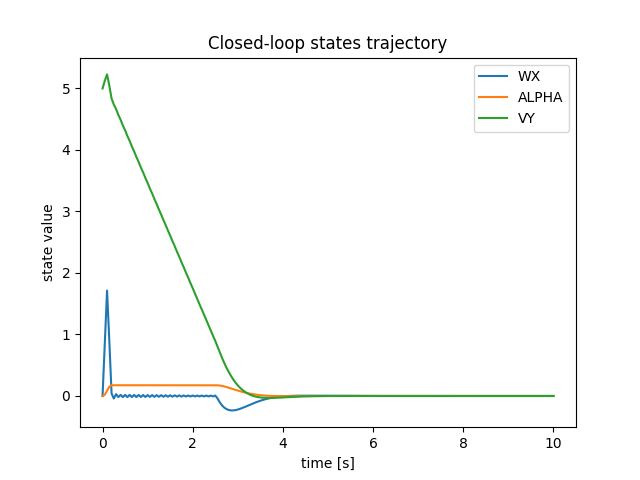

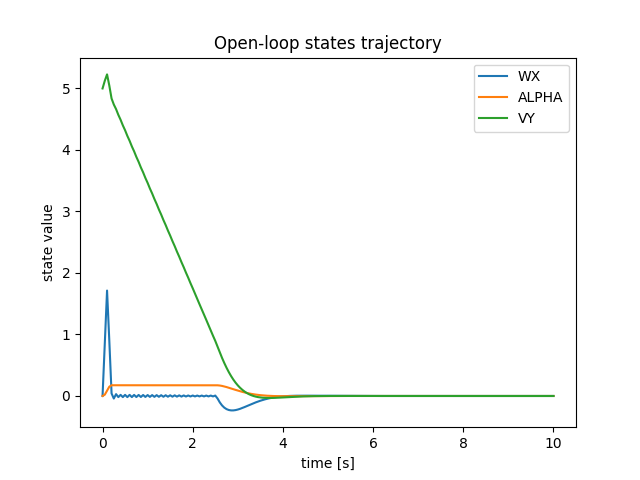

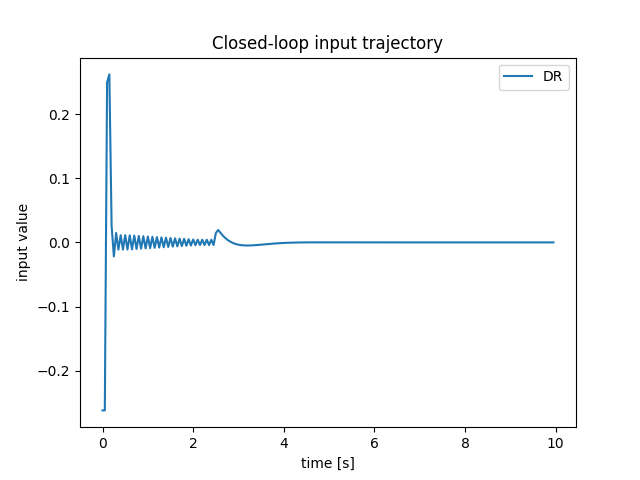

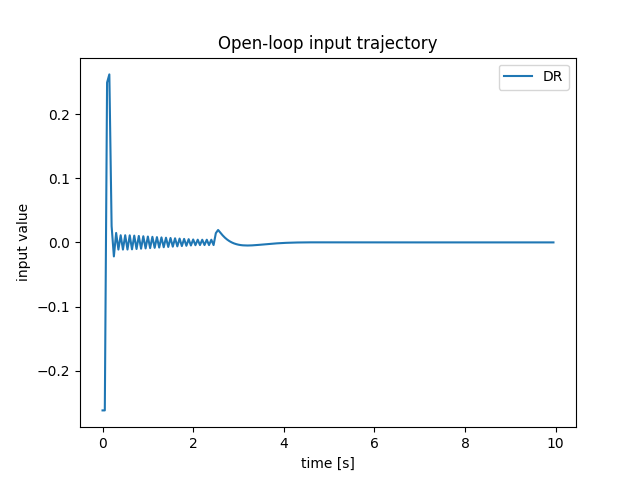

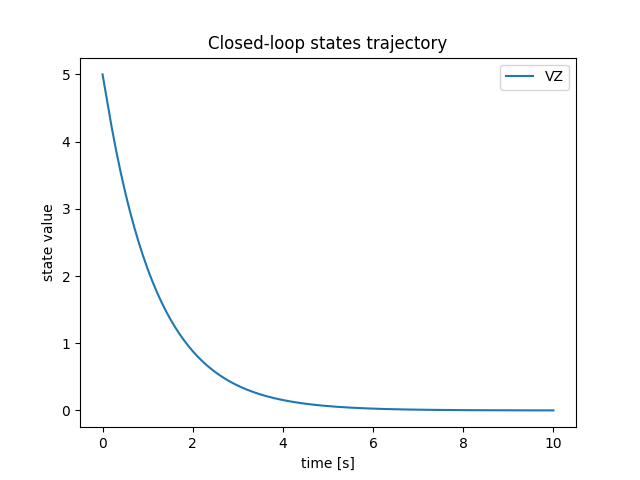

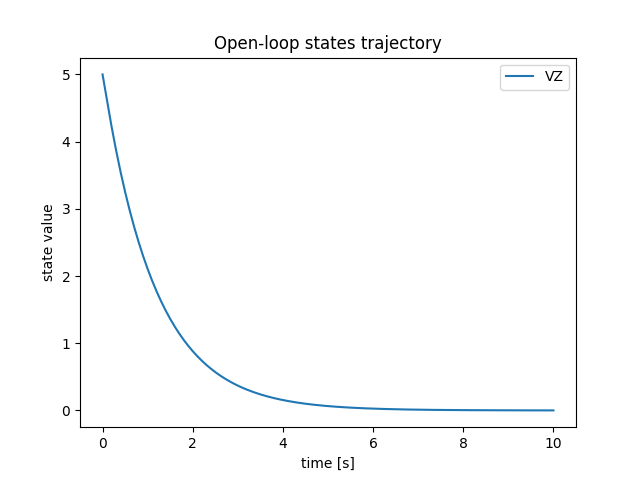

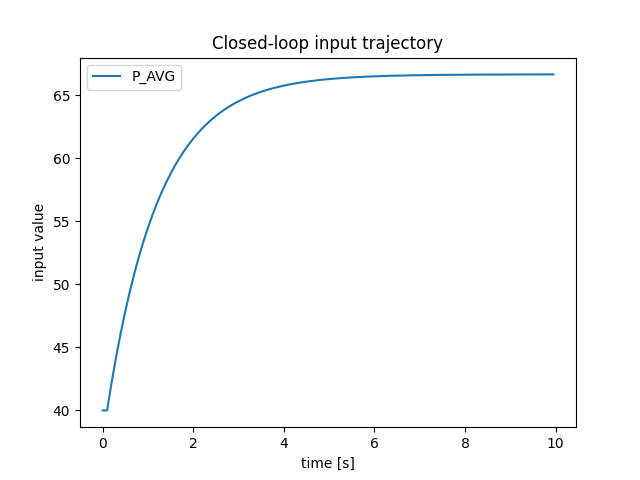

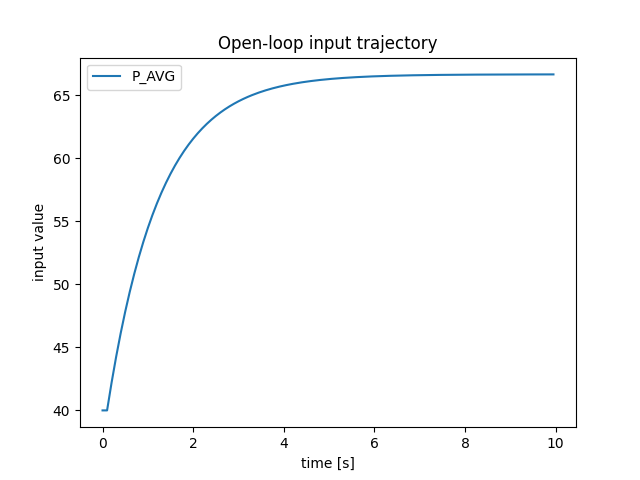

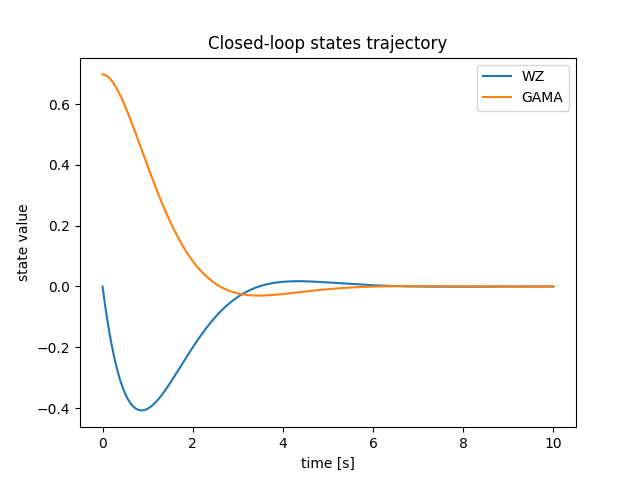

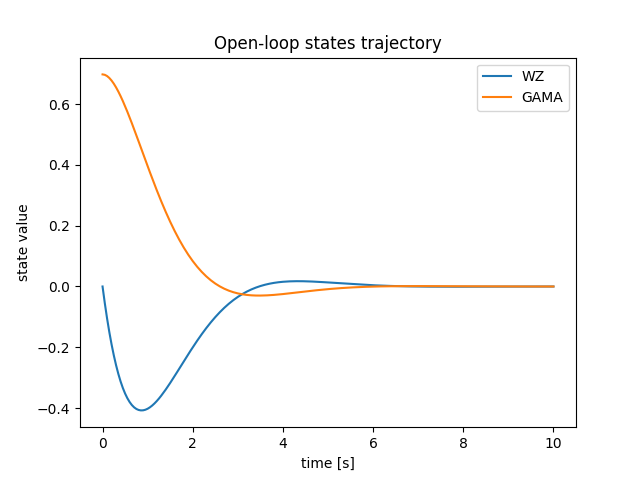

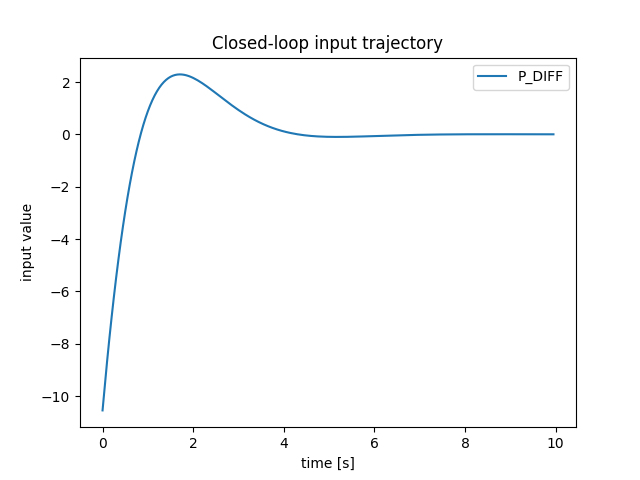

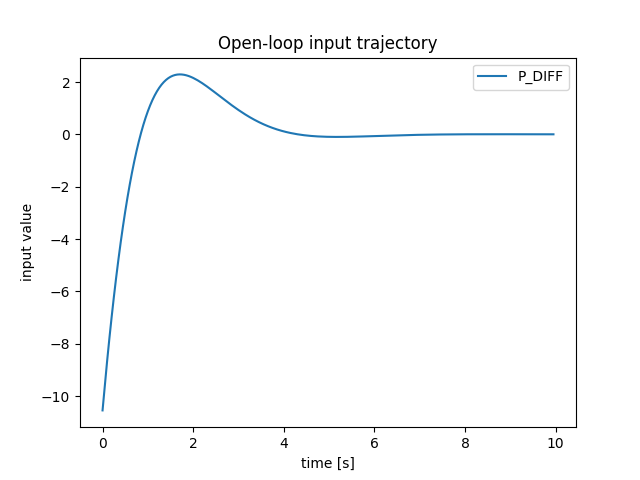

In [4]:
from LinearMPC.utils import plot_trajectory

plot_trajectory(t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, mpc.mpc_x)
plot_trajectory(t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, mpc.mpc_y)
plot_trajectory(t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, mpc.mpc_z)
plot_trajectory(t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, mpc.mpc_roll)


In [5]:
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 0.7
vis.animate(t_cl[:-1], x_cl[:, :-1], u_cl, T_ol=t_ol[:, :-1], X_ol=x_ol, U_ol=u_ol)

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', interval=142, max=199, step=2), Int…

{'fig': <Figure size 640x480 with 16 Axes>,
 'axes': [<Axes: ylabel='inputs'>,
  <Axes: >,
  <Axes: >,
  <Axes: >,
  <Axes: title={'center': 'Subsystem Y'}>,
  <Axes: title={'center': 'Subsystem X'}, ylabel='$\\omega_{\\alpha\\beta\\gamma}$ (deg/s)'>,
  <Axes: title={'center': 'Subsystem Roll'}>,
  <Axes: >,
  <Axes: ylabel='$\\alpha\\beta\\gamma$ (deg)'>,
  <Axes: >,
  <Axes: ylabel='$v$ (m/s)'>,
  <Axes: >,
  <Axes: title={'center': 'Subsystem Z'}>,
  <Axes: ylabel='$\\text{pos}$ (m)'>,
  <Axes: >,
  <Axes: >],
 'plotter': <pyvista.plotting.plotter.Plotter at 0x1638b6690>,
 'scene_objects': {'rocket_actor': Actor (0x1638f8400)
    Center:                     (-0.06306123784072204, -0.18374197419077526, 0.5884844999999999)
    Pickable:                   True
    Position:                   (0.0, 0.0, 0.0)
    Scale:                      (1.0, 1.0, 1.0)
    Visible:                    True
    X Bounds                    -1.125E+00, 9.985E-01
    Y Bounds                    -1.210E+00

VZ <=     4.6066
VZ >=    -2.3033


/Users/jverbois/Python/epfl/MPC-Course-EPFL/Model-Predictive-Control-Project/Deliverable_3_1/LinearMPC/MPCControl_base.py:215: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  ax = plt.figure().gca()


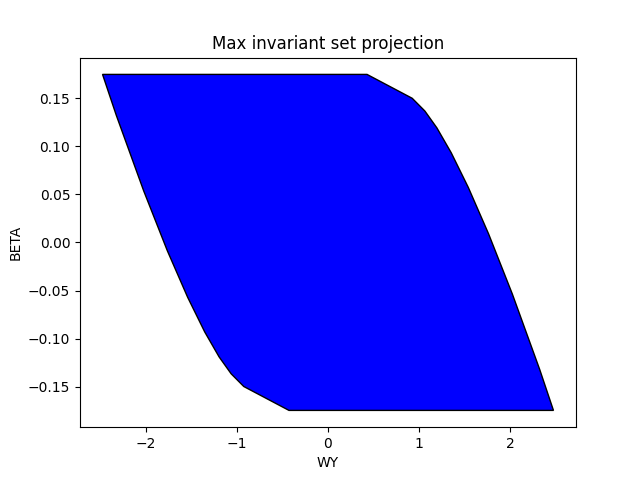

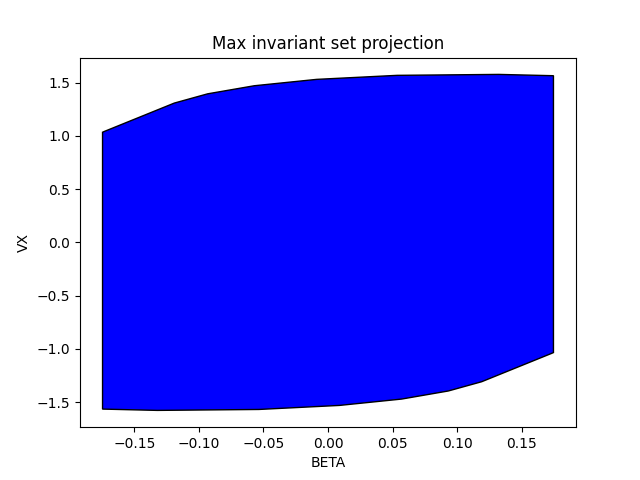

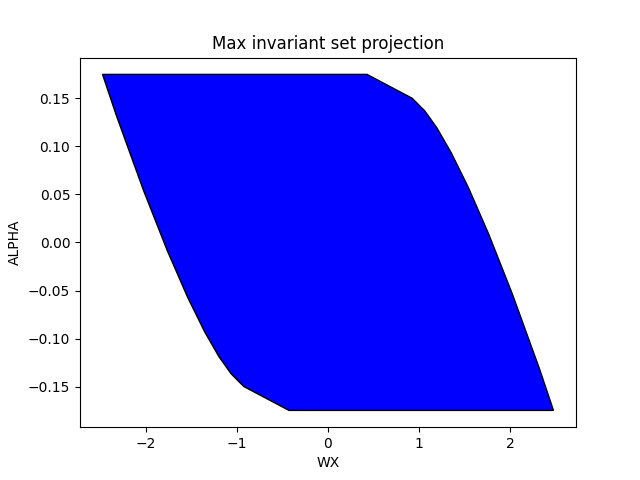

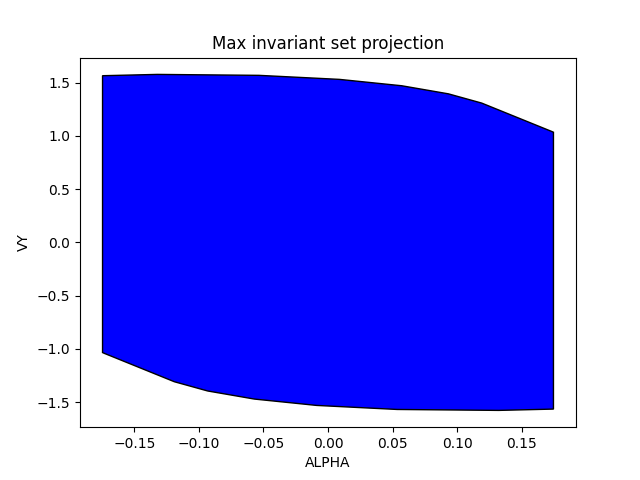

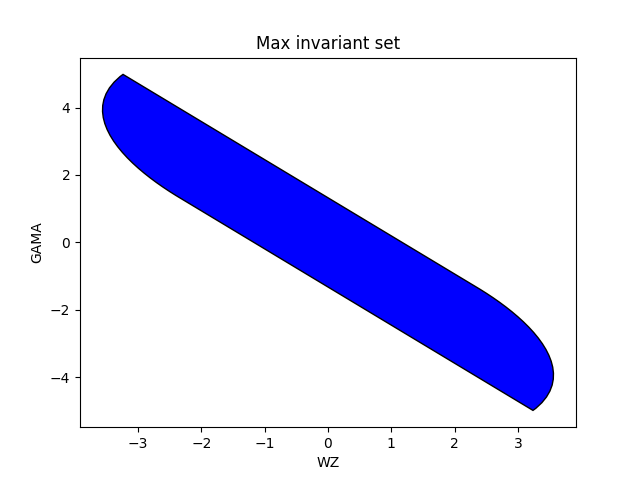

In [6]:
mpc.mpc_x.plot_max_invariant_set()
mpc.mpc_y.plot_max_invariant_set()
mpc.mpc_z.plot_max_invariant_set()
mpc.mpc_roll.plot_max_invariant_set()